# Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

# Constant

In [9]:
DATASET_PATH = '/kaggle/input/heart-failure-prediction/heart.csv'

# Step1: Loading & Transforming the Dataset

In [10]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
# Convert categorical columns to numerical using one-hot encoding
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

# Step 2: Exploratory Data Analysis

### Age Distribution
This histogram shows the distribution of ages in the dataset. It helps to understand the age range of the patients and identify any age-related patterns.

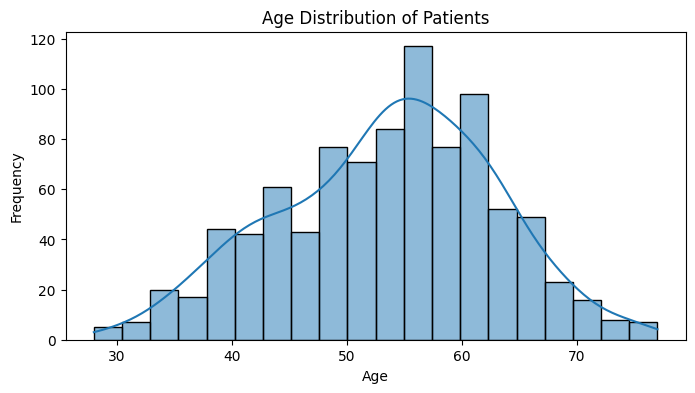

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Chest Pain Type Distribution

This bar chart shows the count of different chest pain types experienced by patients. It helps to identify the most common types of chest pain and their potential association with heart disease.


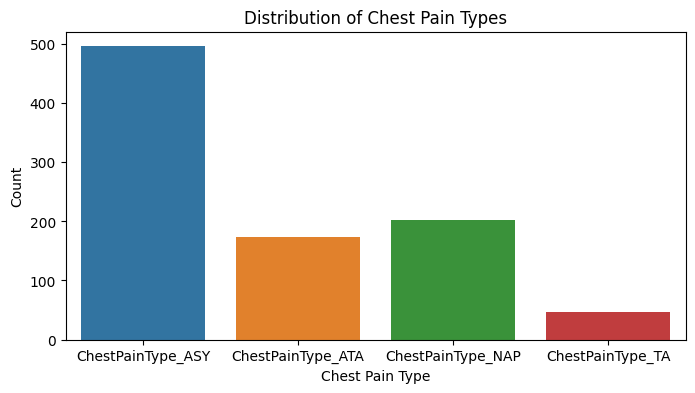

In [14]:
plt.figure(figsize=(8, 4))
chest_pain_counts = df[['ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']].sum()
sns.barplot(x=chest_pain_counts.index, y=chest_pain_counts.values)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### MaxHR Distribution

This histogram shows the distribution of maximum heart rates achieved by patients. It helps to understand the range and common values of MaxHR in the dataset.

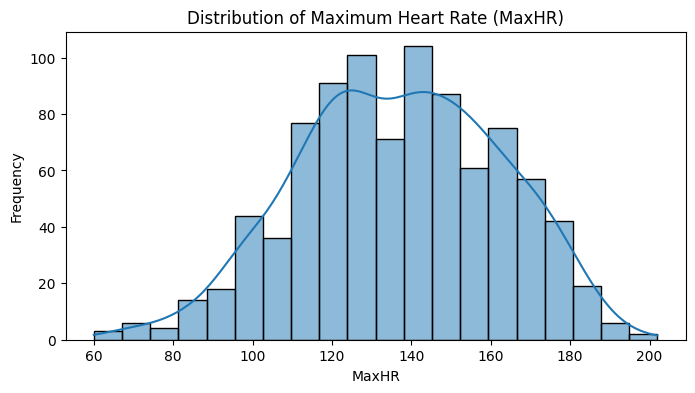

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(df['MaxHR'], bins=20, kde=True)
plt.title('Distribution of Maximum Heart Rate (MaxHR)')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

### Box Plots for Age, RestingBP, Cholesterol, MaxHR, and Oldpeak by Heart Disease Outcome

These box plots compare the distributions of age, resting blood pressure, cholesterol, maximum heart rate, and oldpeak between patients with and without heart disease. They help to identify any significant differences in these features between the two groups.


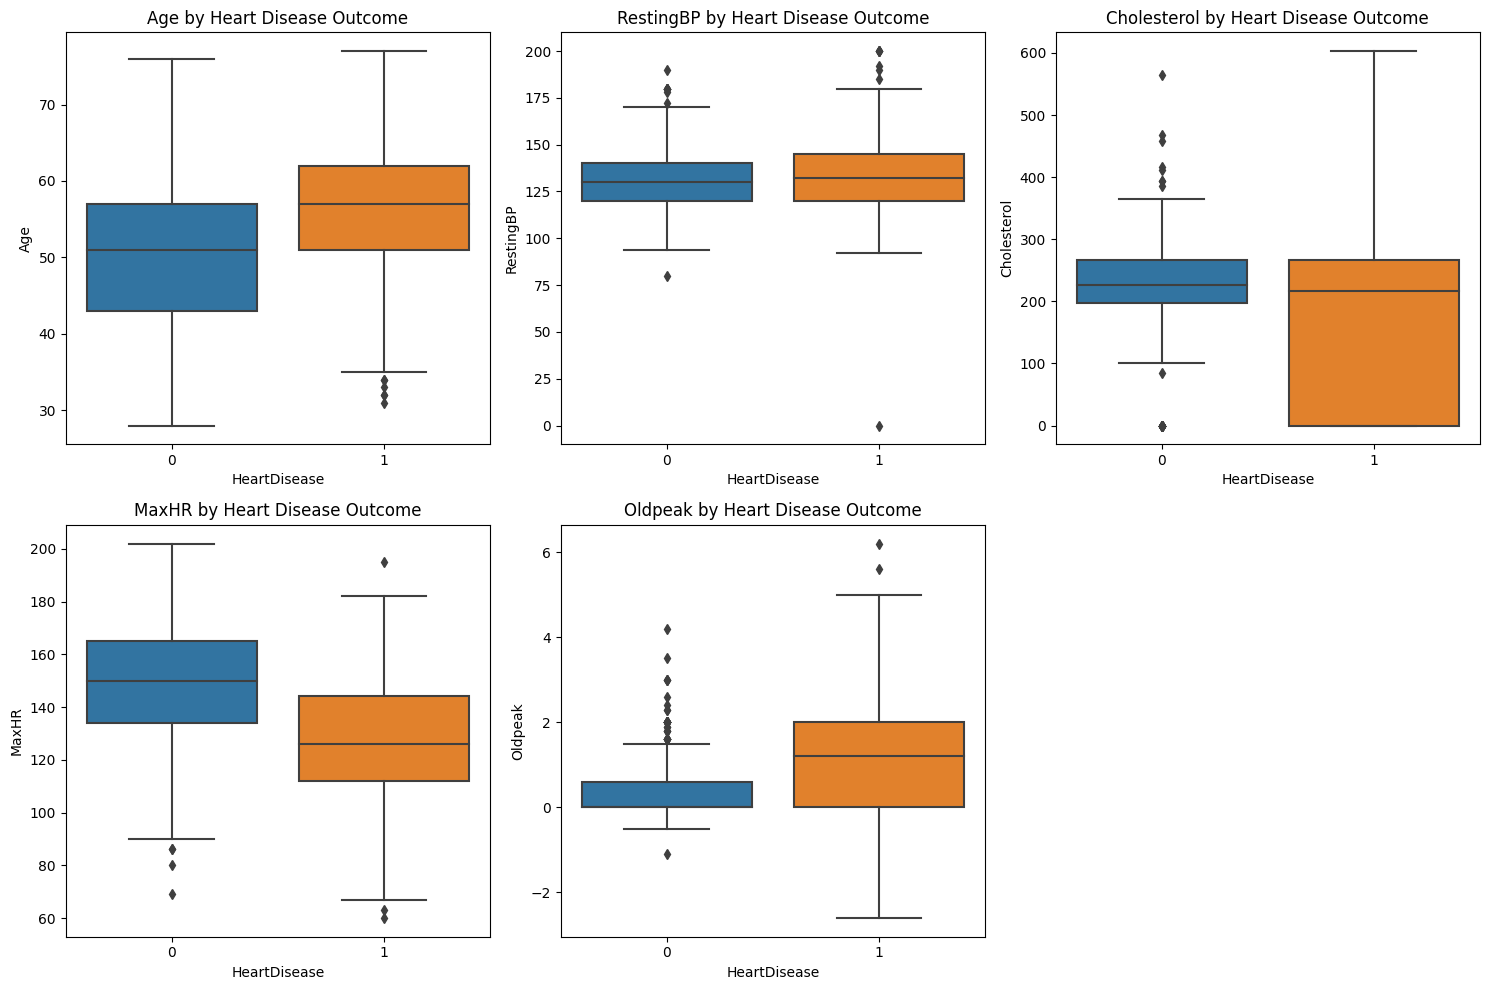

In [16]:
plt.figure(figsize=(15, 10))
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='HeartDisease', y=feature)
    plt.title(f'{feature} by Heart Disease Outcome')
plt.tight_layout()
plt.show()

### Heatmap of Correlation Matrix

This heatmap shows the correlation coefficients between numerical features in the dataset. It helps to identify strong correlations between features, which can provide insights into potential predictors of heart disease.

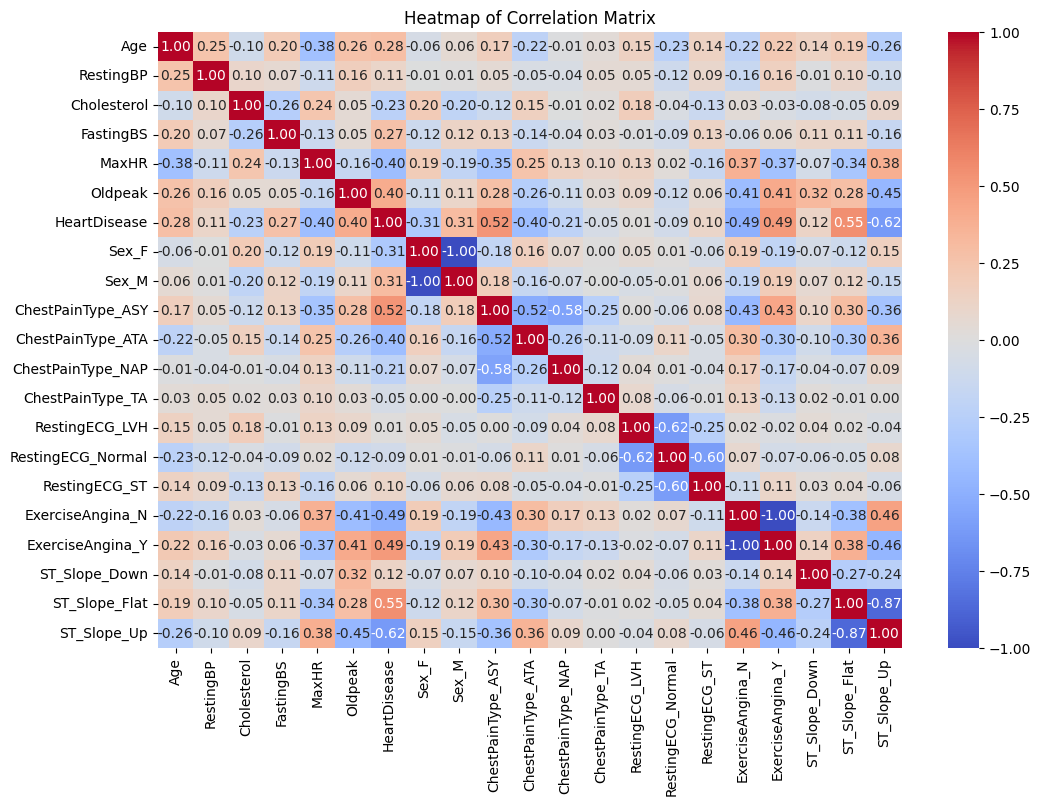

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()